Confirming Gupta net works the same in pytorch and tf

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import h5py

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
from uatu.scattering import *
from kymatio import Scattering2D

In [5]:
model_path = '/home/sean/Git/uatu/networks/gupta_net_smooth_0_epoch_30.pth'
#model_path = '/home/sean/Git/uatu/networks/scattering_resnet_max_mode_2.pth'

In [6]:
mode = 0
max_order = 0

J = 0
L = 8
K = int(1 + L*J +(L**2)*(J*(J-1))/2.0)

width = 2
smooth = 0
shape = (256, 256)

In [7]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

In [8]:
scattering = lambda x: x

In [9]:
try:
    del model
except:
    pass

model = GuptaNet(1).to(device)

In [10]:
model.eval()

GuptaNet(
  (layer_0): BasicBlock(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): LeakyReLU(negative_slope=0.01, inplace=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (downsample): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer_1): BasicBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): LeakyReLU(negative_slope=0.01, inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (downsample): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer_2): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): LeakyReLU(negative_slope=0.01, inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (downsample): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (relu): LeakyReLU(negative_slope=0.01, inplace=True)
  (fc

In [11]:
def test(model, x, y, cost_fn):
    x, y = torch.Tensor(x).to(device), torch.Tensor(y).to(device)
    output = model(x)
    #loss = cost_fn(output, y) 
    
    return output.to('cpu').detach().numpy()#, loss.to('cpu').detach().numpy()

In [12]:
f = h5py.File('../data/UatuLightconeTraining.hdf5', 'r')
mean, std =  f.attrs['mean'], f.attrs['std']
f.close()

In [13]:
f = h5py.File('../data/UatuLightconeSameSeed.hdf5', 'r')
#for boxno in xrange(5):
boxno = 2
target_boxno = 3
test_X = np.array(f['Box%03d'%boxno]["X"][()])
test_Y = f['Box%03d'%boxno]['Y'][0].reshape((1,2))

In [14]:
test_X = (test_X-mean)/(std)

In [15]:
n = 100 #100 
batch_size = 1

X = test_X[n, :, :, :].reshape((1, test_X.shape[1],\
                                test_X.shape[2], test_X.shape[3]))
#X = (X-mean)/(std)
X = np.tile(X, (batch_size, 1, 1, 1) )
Y = test_Y[0, :].reshape((1, test_Y.shape[1]))
Y = np.tile(Y, (batch_size, 1))

In [16]:
pred = test(model, X,Y, cost_fn=lambda x,y: torch.nn.functional.l1_loss(x,y, reduction='sum'))

In [17]:
pred.shape

(1, 2)

In [18]:
pred

array([[-0.08335534, -0.07337447]], dtype=float32)

TypeError: Invalid shape () for image data

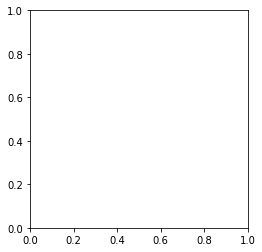

In [19]:
plt.imshow(pred[0,0])

In [ ]:
pred[0, 0][:10]